In [1]:
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path
import math
import xarray as xr

(128, 128, 128)

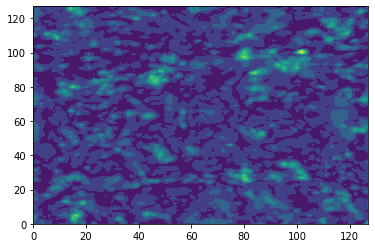

In [23]:
dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/DNS_model/condensation_collision/r10n10/'
file='Zk14'
filedir=dir+file
fh = Dataset(filedir,mode='r')
QVK=fh.variables['QVK'][:]
THK=fh.variables['TTK'][:]
#ZXK=fh.variables['ZXK'][:]
#dimension is in (z,y,x) order
fh.close()
#ZXK1=ZXK[0][:][:][:][:]

QV1=QVK[0,:,:,:]
TH1=THK[0,:,:,:]
C_QV = np.zeros((128,128,65),dtype=complex)
C_TH = np.zeros((128,128,65),dtype=complex)
#C_ZXK = np.zeros((128,128,65),dtype=complex)
C_QV.real[:,:,:]=QV1[0,:,:,:]
C_QV.imag[:,:,:]=QV1[1,:,:,:]
C_TH.real[:,:,:]=TH1[0,:,:,:]
C_TH.imag[:,:,:]=TH1[1,:,:,:]
n=128

C_fft=C_TH
C_3d=np.zeros((128,128,128),dtype=complex)
C_3d[:,:,0:int(n/2)+1]=C_fft

nrange=range(0,int(n/2)-1)
for kx in nrange:
    ikx=int(n/2)-1-kx
    inkx=int(n/2)+1+kx
    #print(inkx,ikx,kx)
    C_3d[:,:,inkx]=np.conj(C_fft[:,:,ikx])
    
#impose realistic boundary condition
# First, negative ky axis; no communication required
# Set zk(0,-ky,0) = conjg(zk(0,ky,0)) 
for ky in nrange:
    iky=int(n/2)-1-ky
    inky=int(n/2)+1+ky
    #print(ky,inky)
    C_3d[0,inky,0]=np.conj(C_fft[0,iky,0])
    
# Then Negative kz axis. Set Set zk(0,0,-kz) = conjg(zk(0,0,kz))  
for kz in nrange:
    ikz=int(n/2)-1-kz
    inkz=int(n/2)+1+kz
    C_3d[inkz,0,0]=np.conj(C_fft[ikz,0,0])
    
#Do rest of kx=0 plane
for (ky,kz) in itertools.product(nrange,nrange):
    ikz=int(n/2)-1-kz
    inkz=int(n/2)+1+kz
    iky=int(n/2)-1-ky
    inky=int(n/2)+1+ky
    C_3d[inkz,inky,0]=np.conj(C_fft[ikz,iky,0])
    C_3d[ikz,inky,0]=np.conj(C_fft[inkz,iky,0])

#do forward fourier transform 
# first shift the matrix to the symmetric
C_3d=np.fft.fftshift(C_3d, axes=(0,1,2))
C_abs=abs(C_3d)
C_fftkr=np.fft.fftn((C_3d))
C_physical=np.sqrt(C_fftkr.real**2+C_fftkr.imag**2)
#plt.grid
plt.contourf(C_physical[1,:,:])
#C_ZXK.real[:,:,:]=ZXK1[0,:,:,:]
#C_ZXK.imag[:,:,:]=ZXK1[1,:,:,:]
#C_QV_conj=-
C_physical.shape

In [24]:
int(n/2)+1

65

In [21]:
QV1.shape

(2, 128, 128, 65)

0.0027069668

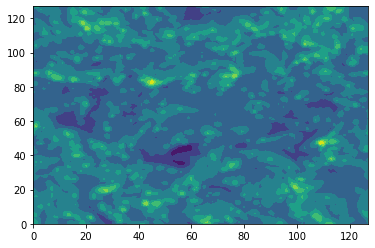

In [13]:
#plot realspace var from out.ncf
dir='/glade/u/home/sisichen/work_dir/projects_results/IUGG_UAE/DNS_model/condensation_collision/r10n10/'
file='out.ncf'
filedir=dir+file
fh = Dataset(filedir,mode='r')
ZX=fh.variables['ZX'][0]
ZY=fh.variables['ZY'][0]
ZZ=fh.variables['ZZ'][0]
QV=fh.variables['QV'][0]
TH=fh.variables['TH'][0]
U=fh.variables['U'][0]
fh.close()
TH_trans=np.transpose(TH, (1, 0,2))
plt.contourf(TH_trans[:,1,:])


In [19]:
TH_trans.max()

0.0027069668

In [20]:
C_physical.max()

0.0017998878055462185